$
z_{k+1}=z_k-\frac{\eta{i_k}\Delta{t}}{Q}+w_k\\
v_k=OCV{(z_k)}-i_kR+v_k\\$<br>

$
\begin{array}{lccccc}
\hline\rule{0pt}{3.5ex} \text { Method } & \gamma & \alpha_0^{(\mathrm{m})} & \alpha_k^{(\mathrm{m})} & \alpha_0^{(\mathrm{c})} & \alpha_k^{(\mathrm{c})} \\
\text { CDKF } & h & \frac{h^2-L}{h^2} & \frac{1}{2 h^2} & \frac{h^2-L}{h^2} & \frac{1}{2 h^2}\rule[-2ex]{0pt}{5ex}\\
\hline
\end{array}
\\$
$_{\quad {}^*h \text{ may take any positive value. For Gaussian RVs, } h = \sqrt{3}}\\\quad{_{L\text{ is the 
dimension of state space vector }x}}$
### <b>SPKF step 1a:</b> State estimate time update. 

- Augmented aposteriori state estimate vector for previous time interval :

$\quad \hat{\chi}{^{a,+}_{k-1}}=\begin{bmatrix}{\hat{\chi}{^+_{k-1}}},&{\bar{w}},&{\bar{v}}\end{bmatrix}$<br><br>
- Augmented aposteriori state covariance estimate vector for previous time interval:

$\quad\sum{^{a,+}_{\tilde{x},k-1}}=\mathrm{diag}({\sum{^{+}_{\tilde{x},k-1}}},\sum{\tilde{w}},\sum{\tilde{v}})$<br><br>
- To generate the p+1 augmented sigma points

$\quad\chi{^{a,+}_{k-1}}=\left\{{\hat{\chi}{^{a,+}_{k-1}}},\quad\hat{\chi}{^{a,+}_{k-1}}+\gamma\sqrt{\sum
{^{a,+}_{\tilde{x},k-1}}},\quad\hat{\chi}{^{a,+}_{k-1}}-\gamma\sqrt{\sum{^{a,+}_{\tilde{x},k-1}}}\right\}\\ \quad \rule[-1.5ex]{0pt}{4.5ex}
\mathcal{X}_{k, i}^{x,-}=f\left(\mathcal{X}_{k-1, i}^{x,+}, u_{k-1}, \mathcal{X}_{k-1, i}^{w,+}\right)
$
$
\begin{aligned}
\quad\hat{x}_k^{-} & =\mathbb{E}\left[f\left(x_{k-1}, u_{k-1}, w_{k-1}\right) \mid \mathbb{Y}_{k-1}\right]
 \approx \sum_{i=0}^p \alpha_i^{(\mathrm{m})} f\left(\mathcal{X}_{k-1, i}^{x,+}, u_{k-1}, \mathcal{X}_
 {k-1, i}^{w,+}\right)
 =\sum_{i=0}^p \alpha_i^{(\mathrm{m})} \mathcal{X}_{k, i}^{x,-}
\end{aligned}
$
### <b>SPKF step 1b:</b> Error covariance time update.

- Using the *apriori* sigma points from step 1a, the *apriori* covariance
estimate is computed as :

$\quad\large{{\Sigma}^{-}_{\tilde{x},k} = \sum_{i=0}^{p} \alpha_i^{(c)} (\mathcal{X}_{k,i}^{x,-} - \hat{x}
_k^{-}) (\mathcal{X}_{k,i}^{x,-} - \hat{x}_k^{-})^T
}$
### <b>SPKF step 1c:</b> Estimate system output $y_k$.
- First, we compute the points :

$\quad
\mathcal{Y}_{k,i} = h(\mathcal{X}_{k,i}^{x,-}, u_k, \mathcal{X}_{k-1,i}^{v,+})
$
- The output estimate is then

$\quad
\hat{y}_k = \mathbb{E}[h(x_k, u_k, v_k) \mid \mathbb{Y}_{k-1}] \approx \sum_{i=0}^{p} \alpha_i^{(m)} h(\mathcal{X}_{k,i}^x, u_k, \mathcal{X}_{k-1,i}^{v,+}) = \sum_{i=0}^{p} \alpha_i^{(m)} \mathcal{Y}_{k,i}.
$
### <b>SPKF step 2a:</b> Estimator gain matrix $L_k$
- To compute the estimator gain matrix, we must first compute the
required covariance matrices.

$\large{\quad
\Sigma_{\tilde{y} , k}=\sum_{i=0}^{p} \alpha_{i}^{( \mathrm{c} )} \big( \mathcal{Y}_{k , i}-\hat{y}_{k} \big) \big( \mathcal{Y}_{k , i}-\hat{y}_{k} \big)^{T}}\\
\rule[-.5ex]{0pt}{3ex}
\large{\quad
\Sigma_{\tilde{x} \tilde{y} , k}^{-}=\sum_{i=0}^{p} \alpha_{i}^{( \mathrm{c} )} \big( \mathcal{X}_{k , i}^{x ,-}-\hat{x}_{k}^{-} \big) \big( \mathcal{Y}_{k , i}-\hat{y}_{k} \big)^{T}}$

- Then, we simply compute $L_k=\sum^-_{\tilde{x}\tilde{y},k}\sum^{-1}_{\tilde{y},k}$

### <b>SPKF step 2b:</b> State estimate measurement update.
- The state estimate is computed as

$\quad\hat{x}^+_k=\hat{x}^-_k+L_k{(y_k-\hat{y}_k)}$

### <b>SPKF step 2c:</b> Error covariance measurement update.
- The final step is calculated directly from the optimal formulation:

$\large\quad\sum{^{+}_{\tilde{x},k}}=\sum_{\tilde{x},k}^--
L_k\sum_{\tilde{y},k}L_k^T$


In [18]:
import batteryCell as cell
import numpy as np
from cellESR import LookupTableEstimator as lte
from cellESR import cellESR as ce
import matplotlib.pyplot as plt

In [19]:
# Debug: Check which batteryCell module is being imported
import importlib
import batteryCell as cell

# Force reload the module to get latest changes
importlib.reload(cell)




<module 'batteryCell' from '/home/sbhad/repos/MOSart_cellModelling/pythonModel/batteryCell.py'>

In [20]:
R0=0.015 # Internal resistance [Ohm]
RZlist=[[1e-3,10,0],[1.5e-3,1e4,0]]
dt=1
time=0
ocv_table="Sample_OCV_DoD.csv"
cesr=ce(R0,RZlist)
ocv_lookup=lte(ocv_table)
curr=12.49 # disCharging current [A]
corner="mc"
# Recreate battery cell with reloaded module
battery=cell.Cell(chemID="Li-ion", R0=R0, RZlist=RZlist,corner=corner,seed=42)
battery.current=[curr]
# battery.SoC=[50]
# battery.SoH=[100]
battery.ocv=[battery.ocvEstimator.estimateOCV(battery.SoC[-1],25)]
battery.esr=[battery.cellESR.calculateESR(battery.current[-1],dt)]
battery.voltage=[battery.ocv[-1]-battery.current[-1]*battery.esr[-1]]

print(f"Initial SoH: {battery.SoH[-1]}")
print("Battery object recreated with updated module")

Initial SoH: 95.6476885381007
Battery object recreated with updated module


In [21]:
Nx=1 # Number of states
Nxa=3 # Augmented number of states
Ny=1 # Number of measurements
h=np.sqrt(3) # scaling parameter
inv_2h2 = 1 / (2 * h**2) # 1/(2*h^2)
Wmx=np.array([0]) # Wmx0 = (h**2-Nxa) / (h**2) which is essentially 0 for Nxa=3, h=sqrt(3)
Wmx=np.append(Wmx,[inv_2h2]*(2*Nxa)) # Wmxi = 1/(2*h^2) for i=1,...,2*Nxa
rtWmx=np.sqrt(Wmx)

In [22]:
SigmaW=0.0001*(1/1950)  # Process noise covariance
SigmaV= 0.000001 # Measurement noise covariance
maxIter=3600*5 # 5 hours for testing
xtrue=battery.SoC[-1] # True state
xhat=battery.SoC[-1] # Estimated state
SigmaX=1 # Initial state covariance

print(f"Battery corner: {corner}")
print(f"Actual MaxCapacity: {battery.MaxCapacity:.0f} mAh")
print(f"Actual Coulomb Efficiency: {battery.coulombEffeciency[-1]:.3f}")
print(f"Actual SoH: {battery.SoH[-1]:.1f}%")
print(f"Actual SoC: {battery.SoC[-1]:.1f}%")

# Data logging
time_log=[time]
xstore=np.zeros(maxIter+1)
xstore[0]=xtrue
xhatstore=np.zeros(maxIter+1)
xhatstore[0]=xhat
SigmaXstore=np.zeros(maxIter+1)
SigmaXstore[0]=SigmaX
SoH_log=[battery.SoH[-1]]
voltage_log=[battery.ocv[-1]+battery.current[-1]*battery.esr[-1]]
current_log=[curr]
dSoC_log=np.zeros(maxIter)
OCV_store=np.zeros(maxIter+1)
OCV_store[0]=battery.ocv[-1]

Battery corner: mc
Actual MaxCapacity: 65149 mAh
Actual Coulomb Efficiency: 0.888
Actual SoH: 95.6%
Actual SoC: 96.5%


In [23]:
for k in range(maxIter):
    if(xhat<=1.1):
        print("SoC estimate below 1.1%, stopping simulation.")
        break
    xhata=np.array([xhat,0,0]).reshape(-1,1) # Augmented state
    SigmaXa=np.diag([SigmaX,SigmaW,SigmaV]) # Augmented state covariance
    sSigmaxa=np.linalg.cholesky(SigmaXa) # Cholesky factorization
    X=np.zeros((Nxa,2*Nxa+1)) # Sigma points matrix
    X[:,0]=xhata[:,0] # First sigma point
    for i in range(Nxa):
        X[:,i+1]=xhata[:,0]+h*sSigmaxa[:,i]
        X[:,i+1+Nxa]=xhata[:,0]-h*sSigmaxa[:,i]
    discharge=curr*dt # Discharge in As
    dSoC=100*discharge/(3.6*battery.coulombEffeciency[-1]*battery.MaxCapacity*battery.SoH[-1]/100) # Change in SoC considering SoH
    dSoC_log[k]=dSoC
    Xx=X[0,:]-dSoC # Extract state sigma points
    # print(Xx)
    result=np.sum(Wmx*Xx) # Predicted state mean
    xhat=result
    Xs=(Xx-xhat)*rtWmx # Predicted state covariance
    SigmaX=np.sum(Xs**2)
    # print(SigmaX)
    w=np.random.normal(0,np.sqrt(SigmaW)) # Process noise
    v=np.random.normal(0,np.sqrt(SigmaV)) # Measurement noise
    battery(time,curr+w,25) # Simulate cell for one time step
    xtrue=battery.SoC[-1] # True state

    ytrue=battery.voltage[-1]+v # Measurement
    OCV=ocv_lookup.estimateOCV(100-Xx,25) # Measurement prediction

    # print(OCV)
    Y=OCV*battery.ocvSoH_gain()+curr*cesr.calculateESR(curr,dt)+X[2,:] # Measurement sigma points
    # print(Y )
    # print(i*cesr.calculateESR(i,dt))
    yhat=np.sum(Wmx*Y) # Predicted measurement mean
    OCV_store[k]=yhat-curr*cesr.calculateESR(curr,dt)
    voltage_log.append(yhat)
    Ys=(Y-yhat)*rtWmx # Predicted measurement covariance
    SigmaY=np.sum(Ys**2)
    SigmaXY=np.sum(Xs*Ys) # Cross covariance
    K=SigmaXY/SigmaY # Kalman gain
    xhat=xhat+K*(ytrue-yhat) # State update
    # if(abs(xhat-xtrue)>5 and k>20):
    #     print(xhat,xtrue,k)
    #     break
    SigmaX=SigmaX-K*SigmaY*K # State covariance update
    time+=dt
    time_log.append(time)
    xstore[k+1]=xtrue
    xhatstore[k+1]=xhat
    SigmaXstore[k+1]=SigmaX
    SoH_log.append(battery.SoH[-1])
    # voltage_log.append(battery.voltage[-1])
    current_log.append(curr)

    # if(battery.SoH[-1]<100):
    #    print(battery.SoH[-1],k)
    #    break

# print(xstore)

SoCdegradation called
SoC estimate below 1.1%, stopping simulation.


15226 15226

UKF Performance Metrics:
Mean SoC estimation error: 0.009%
Maximum SoC estimation error: 0.295%
Final SoC error: 0.002%


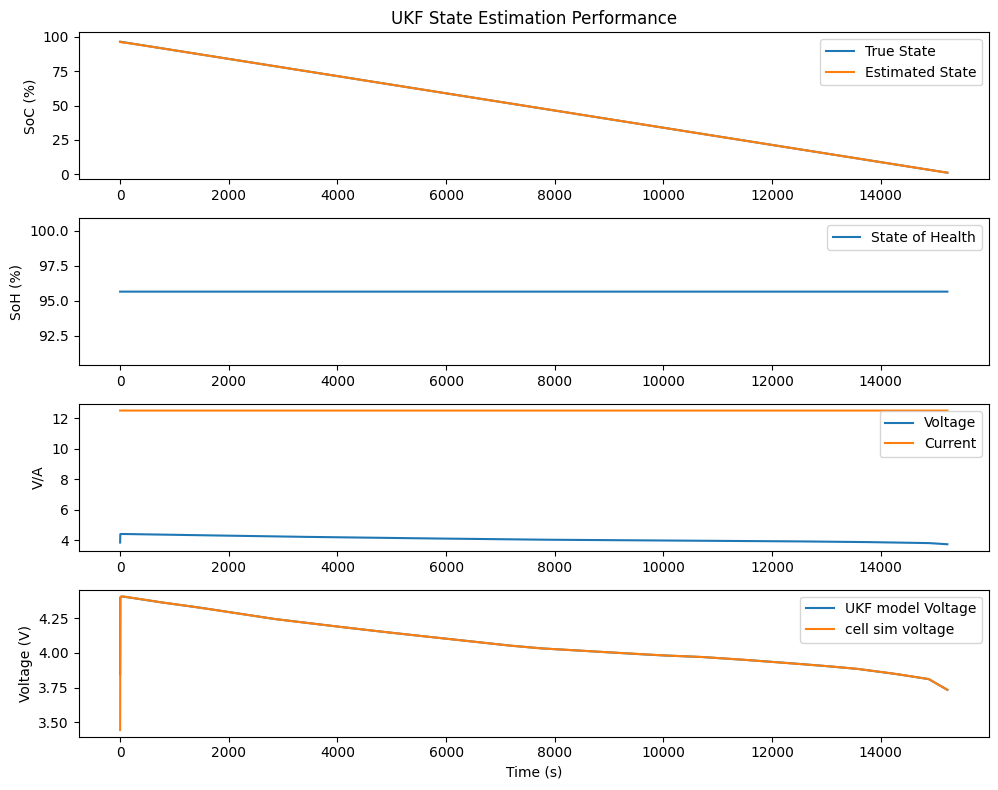

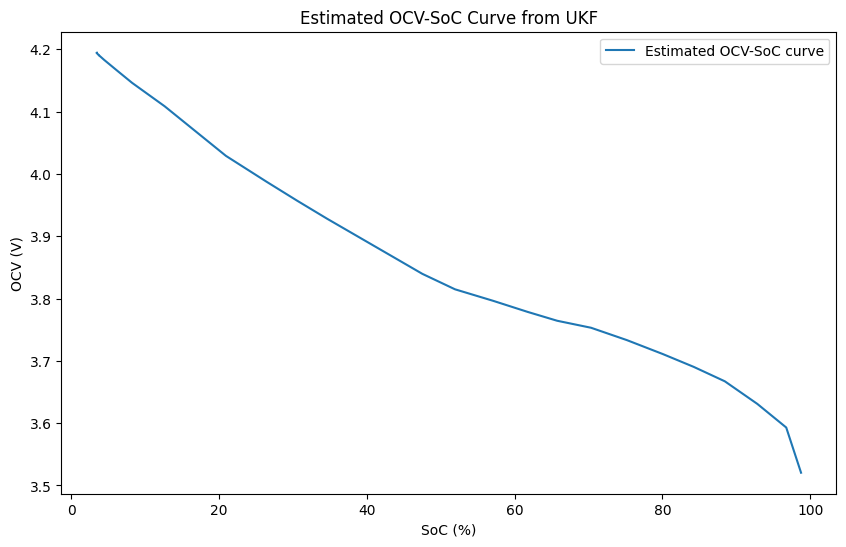

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
print(len(xstore[0:len(time_log)]),len(time_log))
plt.plot(time_log,xstore[0:len(time_log)],label='True State')
plt.plot(time_log,xhatstore[0:len(time_log)],label='Estimated State')
plt.fill_between(time_log,xhatstore[0:len(time_log)]-1.96*np.sqrt(SigmaXstore[0:len(time_log)]),xhatstore[0:len(time_log)]+1.96*np.sqrt(SigmaXstore[0:len(time_log)]),alpha=0.2)
plt.legend()
plt.ylabel('SoC (%)')
plt.title('UKF State Estimation Performance')
plt.subplot(4,1,2)
plt.plot(time_log,SoH_log,label='State of Health')
plt.legend()
plt.ylabel('SoH (%)')
plt.subplot(4,1,3)
plt.plot(time_log,voltage_log,label='Voltage')
plt.plot(time_log,current_log,label='Current')
plt.legend()
plt.ylabel('V/A')
plt.subplot(4,1,4)
plt.plot(time_log,voltage_log[0:len(time_log)],label='UKF model Voltage')
# Fix length mismatch by using the minimum length
min_len = min(len(time_log), len(battery.voltage))
plt.plot(time_log[0:min_len],battery.voltage[0:min_len],label='cell sim voltage')
plt.legend()
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

# Calculate and display accuracy metrics
soc_error = np.abs(np.array(xstore[0:len(time_log)]) - np.array(xhatstore[0:len(time_log)]))
mean_error = np.mean(soc_error)
max_error = np.max(soc_error)
print(f"\nUKF Performance Metrics:")
print(f"Mean SoC estimation error: {mean_error:.3f}%")
print(f"Maximum SoC estimation error: {max_error:.3f}%")
print(f"Final SoC error: {soc_error[-1]:.3f}%")

plt.tight_layout()
plt.show()
plt.figure(figsize=(10,6))
plt.plot(100-xhatstore[0:-2800],OCV_store[0:-2800],label='Estimated OCV-SoC curve')
plt.xlabel('SoC (%)')
plt.ylabel('OCV (V)')
plt.title('Estimated OCV-SoC Curve from UKF')
plt.legend()
plt.show()

In [25]:
battery.coulombEffeciency[-1]
battery.MaxCapacity

65149.01424590337